### Project: Investigate a Dataset - TMDb movies

### Introduction
#### Dataset Description
##### In this report, I will be analysing tmdb-movies.csv. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

##### The dataset contains the following columns:

##### `id`: an integer representing the unique ID for the movie within the dataset.
##### `imdb_id`: a string representing the movie's ID on IMDB (if available).
##### `popularity`: a float representing Popularity score for the movie on TMDB.
##### `budget`: an integer representing the budget of the movie in USD.
##### `revenue`: an integer representing the revenue of the movie in USD.
##### `original_title`: a string representing original title of the movie.
##### `cast`: The cast of the movie containing multiple values separated by |.
##### `homepage`: a string representing the URL of the official website of the movie.
##### `director`: a string representing the name of the direction of the movie.
##### `tagline`: a string representing the tagline of the movie, which is a short phrase or sentence used to advertise the film and capture the audience's attention.
##### `keywords`: The keywords associated with the movie separated by |.
##### `overview`: a string representing a short summary of the movie plot.
##### `runtime`: an integer representing the runtime of the movie in minutes.
##### `genres`: The list of genres the movies belongs to separated by |.
##### `production_companies`: The list of companies that produced the movie separated by |.
##### `release_date`: The release date of the movie in format month/day/year.
##### `vote_count`: an integer representing the vote count of the movie.
##### `vote_average`: a float representing the average votes of the movie.
##### `release_year`: The year of release of the movie.
##### `budget_adj`: The budget of the movie in terms of 2010 USD, accounting for inflation over time.
##### `revenue_adj`: The revenue of the movie in terms of 2010 USD, accounting for inflation over time.

### Question(s) for Analysis
### The aim of this analysis is to answer questions including:
##### 1.What movie lengths are most liked by audiences according to their popularity?
##### 2.Is a higher budget associated with a higher revenue?
##### 3.Who holds the record for the most frequent appearances in movies?
##### 4.Which movies has the highest and lowest profit?
##### 5.Which genres were produced the most and which were the most popular?
##### 6.Which production company has the highest # of releases over the years?
##### 7.How does runtime and vote average correlate?
##### 8.Which day of week does have the highest number of releases?
##### 9.How do budget and release year together affect revenue?

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# magic word for matplotlib inline plotting.
%matplotlib inline

## Data Wearing
#### Load the Data

In [2]:
df = pd.read_csv("tmdb-movies.csv")

In [3]:
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
# taking a look at number of unique values
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
df.describe(include=object)

,imdb_id,original_title,cast,homepage,director,tagline,keywords,overview,genres,production_companies,release_date
count,10856,10866,10790,2936,10822,8042,9373,10862,10843,9836,10866
unique,10855,10571,10719,2896,5067,7997,8804,10847,2039,7445,5909
top,tt0411951,Hamlet,Louis C.K.,http://www.missionimpossible.com/,Woody Allen,Based on a true story.,woman director,No overview found.,Comedy,Paramount Pictures,1/1/09
freq,2,4,6,4,45,5,134,13,712,156,28


# Data Cleaning

#### In Data Cleaning: 
1. Our dataset consists of a total of 10866 rows and 21 columns.
2. We have only 1 duplicated row which would be droped.
3. Some columns wont be useful in answering our questions using analysis.
4. Few columns have many missing values that needs to be handled.
5. Columns `cast` `director` `genre` have values saperated with a '|'.
6. `release_date`'s data type needs to be casted.
7. We can append a column for the movie `profit` using formula $profit = revenue - budget$.
8. `vote_average` better be presented as a catecorical variable that groubs multible ratings values.
9. We may also catigorize `profit` column for better EDA

#### Find the duplicat values 

In [9]:
df.duplicated().sum()

np.int64(1)

#### Drop the duplicat value

In [10]:
df.drop_duplicates(inplace= True)

#### Now check the new number of records

In [11]:
df.shape[0]

10865

##### Now we can see it decreased from  10866 to 10865

#### Check from data frame columns

In [12]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

after going through all the columns, we decided that columns: `id` `imdb_id` `homepage` `revenue_adj` `budget_adj` `tagline` `overview` `keywords`  will not be very usefull, so we will drop them and continue with our analysis

In [13]:
df.drop(['id','imdb_id','homepage','revenue_adj','budget_adj','tagline','overview','keywords'],axis = 1, inplace = True)

In [14]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year'],
      dtype='object')

In [15]:
df

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966
10862,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966
10863,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966
10864,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int64  
 2   revenue               10865 non-null  int64  
 3   original_title        10865 non-null  object 
 4   cast                  10789 non-null  object 
 5   director              10821 non-null  object 
 6   runtime               10865 non-null  int64  
 7   genres                10842 non-null  object 
 8   production_companies  9835 non-null   object 
 9   release_date          10865 non-null  object 
 10  vote_count            10865 non-null  int64  
 11  vote_average          10865 non-null  float64
 12  release_year          10865 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.2+ MB


#### Dealing with null values

In [17]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

#### For the `cast` attribute, replace the null values with 'Unknown cast' string. an empty string for example would not have meaning in the case.

In [18]:
df['cast'].fillna('Unknown cast',inplace = True)

C:\Users\Prathamesh Yadav\AppData\Local\Temp\ipykernel_20372\4171707394.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cast'].fillna('Unknown cast',inplace = True)


#### For the `director` attribute, replace the null values with 'Unknown director' string. an empty string for example would not have meaning in the case.

In [19]:
df['director'].fillna('Unkown director',inplace = True)

C:\Users\Prathamesh Yadav\AppData\Local\Temp\ipykernel_20372\4180356607.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unkown director',inplace = True)


#### For the `genres` attribute, replace the null values with 'Unknown genre' string. an empty string for example would not have meaning in the case.

In [20]:
df['genres'].fillna('Unkown genres',inplace = True)

C:\Users\Prathamesh Yadav\AppData\Local\Temp\ipykernel_20372\1360662808.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genres'].fillna('Unkown genres',inplace = True)


#### For the `production_companies` attribute, replace the null values with 'Unknown production company' string. an empty string for example would not have meaning in the case.

In [21]:
 df['production_companies'].fillna('Unkown production_companies',inplace = True)

C:\Users\Prathamesh Yadav\AppData\Local\Temp\ipykernel_20372\2617963836.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['production_companies'].fillna('Unkown production_companies',inplace = True)


### Dealing with multi-value attributes
#### For a multi-value atteibute, I will split it, trim, capitalize, and make all of the vlaues distinct in each enty.
#### This process ensures consistence and prevent wrong results due to variations in string cas (uppercase, lowercase,etc..) and duplicates.
#### For this section,`cast`,`genres`, and `production_companies` attributes will be process.
#### Here, we defince a fuction to split these strings, trim and capitalize the output, and return the distict values in each string.

In [22]:
def split_and_capitalize_unique(string, delimiter = '|'):
    return np.array(list({word.strip().capitalize() for word in string.split(delimiter)}))
   

#### Now do the spilt for the latter mentioned attributes.

In [23]:
for attr in ['cast','genres','production_companies']:
    df[attr] = df[attr].apply(split_and_capitalize_unique)

In [24]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,"[Nick robinson, Bryce dallas howard, Vincent d...",Colin Trevorrow,124,"[Action, Science fiction, Adventure, Thriller]","[Amblin entertainment, Legendary pictures, Den...",6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom hardy, Nicholas hoult, Hugh keays-byrne, ...",George Miller,120,"[Action, Science fiction, Adventure, Thriller]","[Kennedy miller productions, Village roadshow ...",5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,"[Shailene woodley, Miles teller, Kate winslet,...",Robert Schwentke,119,"[Adventure, Science fiction, Thriller]","[Neoreel, Summit entertainment, Mandeville fil...",3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Carrie fisher, Adam driver, Mark hamill, Dais...",J.J. Abrams,136,"[Action, Science fiction, Adventure, Fantasy]","[Truenorth productions, Bad robot, Lucasfilm]",12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,"[Dwayne johnson, Michelle rodriguez, Jason sta...",James Wan,137,"[Action, Crime, Thriller]","[One race films, Original film, Media rights c...",4/1/15,2947,7.3,2015


#### Dealing with attributes that have unreasonable values
##### As we noticed earlier, we have movie that have 0 budget and movies with 0 runtime,Let's deal with this.
##### For runtime, let's get the total count of movies that has 0 runtime it.

In [25]:
len(df[df['runtime'] ==0 ])

31

##### As we can see, a few records of the total # of records have a runtime value zero, we can fill the missing value with the mean of runtimes, as the value of 0 for the runtime means that the movie dose not have any content, which is impossible.

In [26]:
# calculate the mean of non-zero runtime.
mean = np.mean(df[df['runtime'] > 0]['runtime'])
# assign the calculated mean to each zero valu of runtime
df['runtime'] = np.where(df['runtime'] == 0, mean, df['runtime'])

##### Let's check again for zero values for runtime.

In [27]:
len(df[df['runtime'] == 0])

0

##### For the `budget`, there are values of zero, but for a movie, its budget could be zero, Let's count the number of zero budget values.

In [28]:
len(df[df['budget'] == 0])

5696

##### That is a high number of zero, representing roughly 50% of the data.
##### replacing these values with the mean would introduce biasing and skewness in the data and the results would not reflect the real thing.
##### As the case of zero budget is rare, i will make these 0 budget as pd.NA value (representing null), to not affect analysis.

In [29]:
df['budget'] = np.where(df['budget'] == 0, np.nan,df['budget'])

##### Let's check for number of zeros for the budget attribute.

In [30]:
len(df[df['budget'] == 0])

0

##### For "outlier" (in mathematical terms),the values of them are reasonable and removing them would affect the result, so l decided to keep them.


#### Datatype conversion and space optimization.

##### And let's look at the datatypes using `DataFrame.dtypes` attribute.

In [31]:
df.dtypes

popularity              float64
budget                  float64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                 float64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

##### Let's display statistics again using `DataFram.describe()` method. 

In [32]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,5.169000e+03,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,0.646446,3.073958e+07,3.982690e+07,102.363855,217.399632,5.975012,2001.321859
std,1.000231,3.890441e+07,1.170083e+08,30.904039,575.644627,0.935138,12.813260
min,0.000065,1.000000e+00,0.000000e+00,2.000000,10.000000,1.500000,1960.000000
25%,0.207575,6.000000e+06,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.383831,1.700000e+07,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.713857,4.000000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


##### for `release_year` attribute, the range is [1960, 2015] onclusive => `int16` types is sufficient.
##### for `vote_count` attribute, the range is [10,9767] inclusive => `int16` type is sufficient.
##### for `revenue` attribute, the range is [0, 2.781506e+09] inclusive => keep `int64`.
##### for `budget` attribute, the range is [1, 4.250000e+08] inclusive => `int32` is sufficient.
##### for `runtime` attribute, the range is [2, 900] inclusive => `int16` is sufficient.
##### for floating point types (rest of the attributes), I think 7 decimal places precision is good => I will choose `float32` type for them.
##### Now let's do the conversion

In [33]:
df['release_year'] = df['release_year'].astype('int16')

In [34]:
df['vote_count'] = df['vote_count'].astype('int16')

In [35]:
df['budget'] = df['budget'].astype(pd.Int32Dtype()) # For null values error prevention

In [36]:
df['runtime'] = df['runtime'].astype('int16')

In [37]:
df['vote_average'] = df['vote_average'].astype('float32')

In [38]:
df['popularity'] = df['popularity'].astype('float32')

##### Now, let's consider the non-numaric datatypes.
##### `cast`,`genres`,`production_companies` are already process.
##### Let's consider the rest of attributes.

In [39]:
df[['original_title','director','release_date']].describe()

,original_title,director,release_date
count,10865,10865,10865
unique,10571,5068,5909
top,Hamlet,Woody Allen,1/1/09
freq,4,45,28


##### As we can see, the number of unique values is not small, therefore, conversion to category type if not a wise choice.
##### For the `release_date` attribute, let's convert it to be able to deal with it in an easy way.
##### But before conversion, let's check for the consistency in format (will be required after a littel bit).

In [40]:
df[df['release_date'].str.match(r'^(?!(\d{1,2}/\d{1,2}/\d{2}))$')]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


##### as we can see, all of the dates following the same format (month/day/year (2 digits)).

##### Now, let's check if the year in date is consistent with its correspong value in `release_year`

In [41]:
# Split the release_date and take the last part of the split (year),
# compare it to the last 2 digits of the release_year attribute.

In [42]:
df[df['release_date'].str.split('/').str[-1].astype('int') != df['release_year'] % 100]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


##### As we can see, all of the vlues are consistent. 
##### Now, the conversion process.
##### The year in the converted date is chosen to be the value in the `release_year` atteibute, as it provide a more clear context (addition 2 digits).
##### Let's define a function that will take a record in a dataframe, extract the required information, and then convert to the required data object.

In [43]:
def get_date(record):
    year = record['release_year']
    month, day = record['release_date'].split('/')[0:2]
    return pd.to_datetime(f'{day}/{month}/{year}', format = '%d/%m/%Y')

In [44]:
df['release_date'] = df[['release_year','release_date']].apply(get_date, axis=1)

##### Let's take a look at the date

In [45]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985764,150000000,1513528810,Jurassic World,"[Nick robinson, Bryce dallas howard, Vincent d...",Colin Trevorrow,124,"[Action, Science fiction, Adventure, Thriller]","[Amblin entertainment, Legendary pictures, Den...",2015-06-09,5562,6.5,2015
1,28.419935,150000000,378436354,Mad Max: Fury Road,"[Tom hardy, Nicholas hoult, Hugh keays-byrne, ...",George Miller,120,"[Action, Science fiction, Adventure, Thriller]","[Kennedy miller productions, Village roadshow ...",2015-05-13,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,"[Shailene woodley, Miles teller, Kate winslet,...",Robert Schwentke,119,"[Adventure, Science fiction, Thriller]","[Neoreel, Summit entertainment, Mandeville fil...",2015-03-18,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Carrie fisher, Adam driver, Mark hamill, Dais...",J.J. Abrams,136,"[Action, Science fiction, Adventure, Fantasy]","[Truenorth productions, Bad robot, Lucasfilm]",2015-12-15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,"[Dwayne johnson, Michelle rodriguez, Jason sta...",James Wan,137,"[Action, Crime, Thriller]","[One race films, Original film, Media rights c...",2015-04-01,2947,7.3,2015


##### Now we can drop the `release_year` attribute since we have the date object.

In [46]:
df.drop(['release_year'], axis=1, inplace = True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10865 non-null  float32       
 1   budget                5169 non-null   Int32         
 2   revenue               10865 non-null  int64         
 3   original_title        10865 non-null  object        
 4   cast                  10865 non-null  object        
 5   director              10865 non-null  object        
 6   runtime               10865 non-null  int16         
 7   genres                10865 non-null  object        
 8   production_companies  10865 non-null  object        
 9   release_date          10865 non-null  datetime64[ns]
 10  vote_count            10865 non-null  int16         
 11  vote_average          10865 non-null  float32       
dtypes: Int32(1), datetime64[ns](1), float32(2), int16(2), int64(1), object(5)
memor

#### Now, all things is set and clean, let's get into our EDA.

### Exploratory Data Analysis
#### Here, we answer out research questions.

### Research Question 1: What movie lenghth are most liked by audiences according to their popularity?

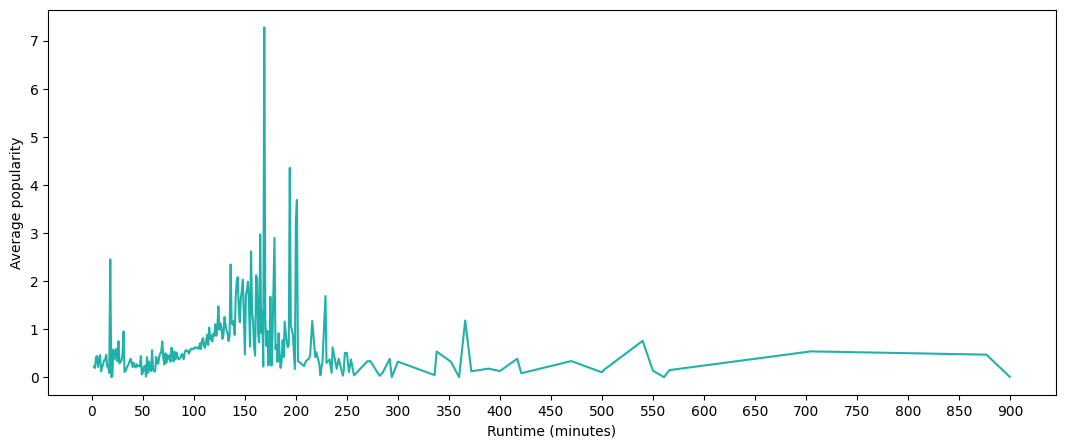

In [48]:
avg_popularity_for_runtime = df.groupby('runtime')['popularity'].mean().reset_index()
plt.figure(figsize=(13, 5))
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average popularity')
plt.xticks(np.arange(0,1000,50))
sns.lineplot(data = avg_popularity_for_runtime, x='runtime', y='popularity',color = 'lightseagreen');

##### As we can observe, The most preferred (popular) runtimes lies between 150 and 200 minute.

### Research Question 2: Is a higher budget associated with a higher revenue?

<Axes: xlabel='Budget', ylabel='Revenue'>

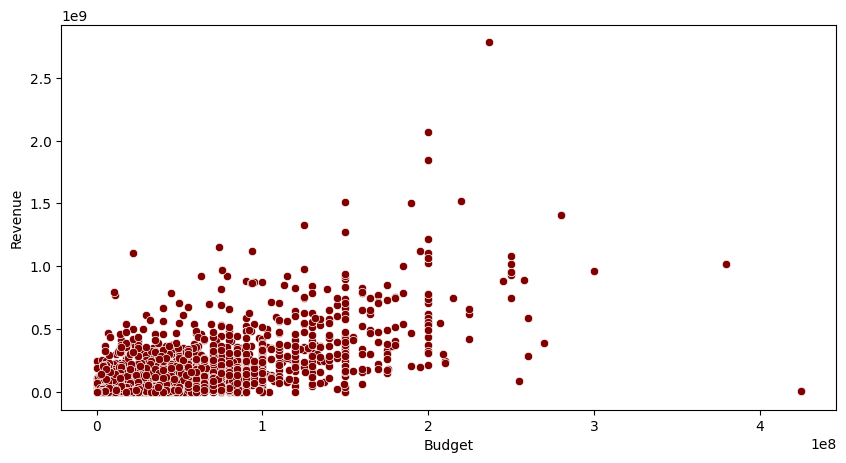

In [49]:
plt.figure(figsize = (10,5))
plt.xlabel('Budget')
plt.ylabel('Revenue')
sns.scatterplot(data=df, x = 'budget', y = 'revenue', color = 'maroon')

##### As we can observe, there is positive rleationship between the `budget` and `revenue` attributes, therefore, a higher budget corresponds to a higher revenue.

##### We can also calculate the correlation between these two attributes to represent our result in a mathematical way.

In [50]:
df[['budget','revenue']].corr()

,budget,revenue
budget,1.000000,0.700162
revenue,0.700162,1.000000


In [51]:
df.head(5)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average
0,32.985764,150000000,1513528810,Jurassic World,"[Nick robinson, Bryce dallas howard, Vincent d...",Colin Trevorrow,124,"[Action, Science fiction, Adventure, Thriller]","[Amblin entertainment, Legendary pictures, Den...",2015-06-09,5562,6.5
1,28.419935,150000000,378436354,Mad Max: Fury Road,"[Tom hardy, Nicholas hoult, Hugh keays-byrne, ...",George Miller,120,"[Action, Science fiction, Adventure, Thriller]","[Kennedy miller productions, Village roadshow ...",2015-05-13,6185,7.1
2,13.112507,110000000,295238201,Insurgent,"[Shailene woodley, Miles teller, Kate winslet,...",Robert Schwentke,119,"[Adventure, Science fiction, Thriller]","[Neoreel, Summit entertainment, Mandeville fil...",2015-03-18,2480,6.3
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Carrie fisher, Adam driver, Mark hamill, Dais...",J.J. Abrams,136,"[Action, Science fiction, Adventure, Fantasy]","[Truenorth productions, Bad robot, Lucasfilm]",2015-12-15,5292,7.5
4,9.335014,190000000,1506249360,Furious 7,"[Dwayne johnson, Michelle rodriguez, Jason sta...",James Wan,137,"[Action, Crime, Thriller]","[One race films, Original film, Media rights c...",2015-04-01,2947,7.3


### Research Question 3: Who holds the record for the most frequent appearances in movies?

C:\Users\Prathamesh Yadav\AppData\Local\Temp\ipykernel_20372\3085684141.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = cast_count_top_20.index, y = cast_count_top_20.values, palette='viridis')


<Axes: xlabel='cast'>

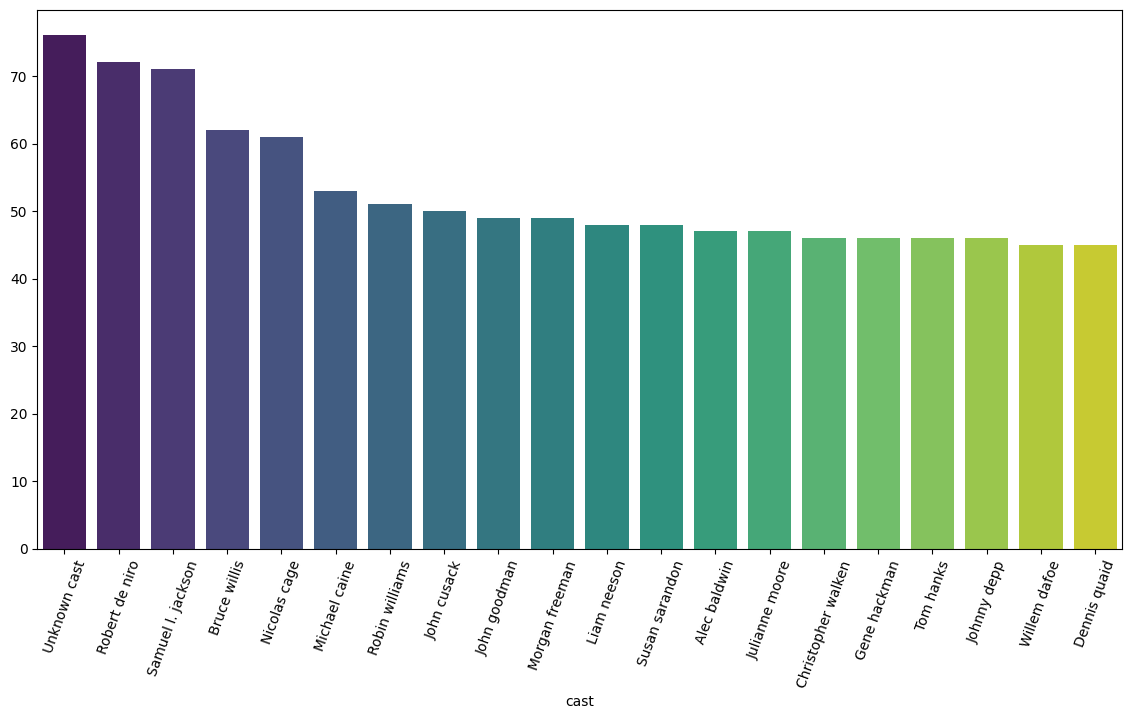

In [52]:
cast_count_top_20 = df['cast'].explode().value_counts()[:20]
plt.figure(figsize=(14,7))
plt.xticks(rotation = 70)
sns.barplot(x = cast_count_top_20.index, y = cast_count_top_20.values, palette='viridis')

In [53]:
cast_count_top_20

cast
Unknown cast          76
Robert de niro        72
Samuel l. jackson     71
Bruce willis          62
Nicolas cage          61
Michael caine         53
Robin williams        51
John cusack           50
John goodman          49
Morgan freeman        49
Liam neeson           48
Susan sarandon        48
Alec baldwin          47
Julianne moore        47
Christopher walken    46
Gene hackman          46
Tom hanks             46
Johnny depp           46
Willem dafoe          45
Dennis quaid          45
Name: count, dtype: int64

### Research Question 4: Which movies has the highest and lowest profit?

##### For this question,Let's establish profit attribute which equals to the revenue means the budget.

In [54]:
df['profit'] = df['revenue'] - df['budget']

##### Now, let's find the movies with min and max profit

In [55]:
min_index = df['profit'].idxmin()
max_index = df['profit'].idxmax()

In [56]:
print(f"The movie with highest profit is:{df['original_title'][max_index]}, with a profit of ${df['profit'][max_index]}")
print(f"The movie with lowest profit is:{df['original_title'][min_index]}, with a profit of ${df['profit'][min_index]}")

The movie with highest profit is:Avatar, with a profit of $2544505847
The movie with lowest profit is:The Warrior's Way, with a profit of $-413912431


##### The movie with the highest profit is 'Avatar' with 2544505847 USD gain.
##### The movie with the lowest profit is 'The Warriors Way' with 413912431 USD loss.

### Research Question 5: Which genres were produced the most and which were the most population?

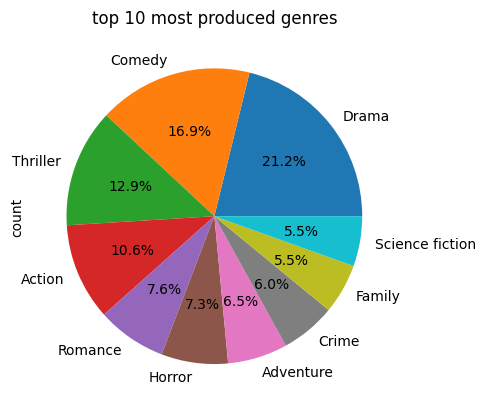

In [57]:
most_produced_genres = df['genres'].explode().value_counts()[:10]
most_produced_genres.plot(kind='pie', title='top 10 most produced genres', autopct='%.1f%%');

##### As the pie shows, The most produced genre is Drama, then Comedy.

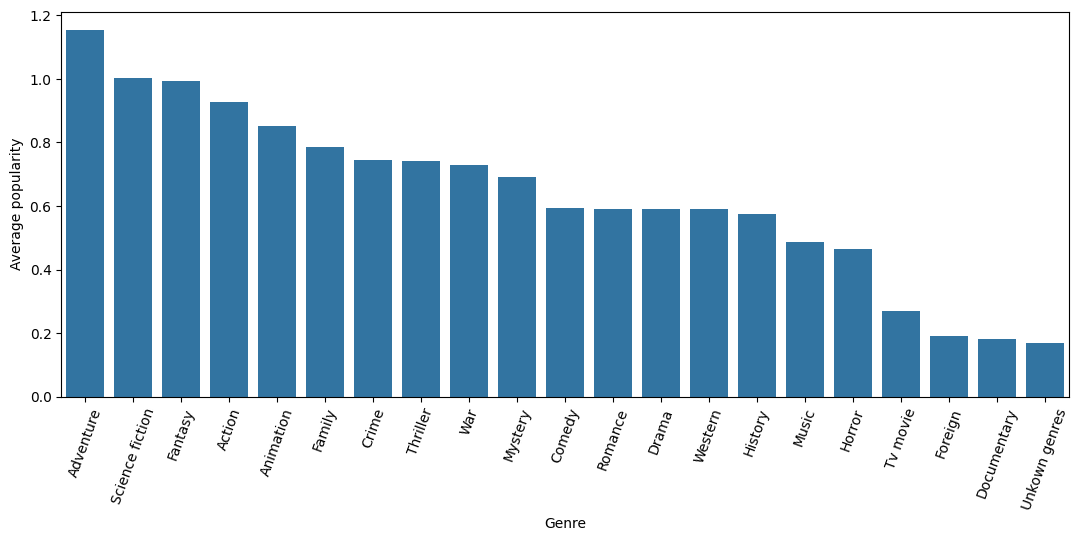

In [58]:
avg_popularity_for_genre = df.explode('genres').groupby('genres')['popularity'].mean().reset_index()
# Sort by popularity in ascending order
avg_popularity_for_genre = avg_popularity_for_genre.sort_values(by='popularity', ascending=False)
plt.figure(figsize=(13,5))
plt.xticks(rotation=70)
sns.barplot(data=avg_popularity_for_genre, x='genres',y='popularity');
plt.xlabel('Genre')
plt.ylabel('Average popularity')
plt.show()

##### As we can observe, The most popular genre in avrage is 'Adventure'

### Research Question 6: which production company has the highest of release over the years?

<Axes: xlabel='production_companies'>

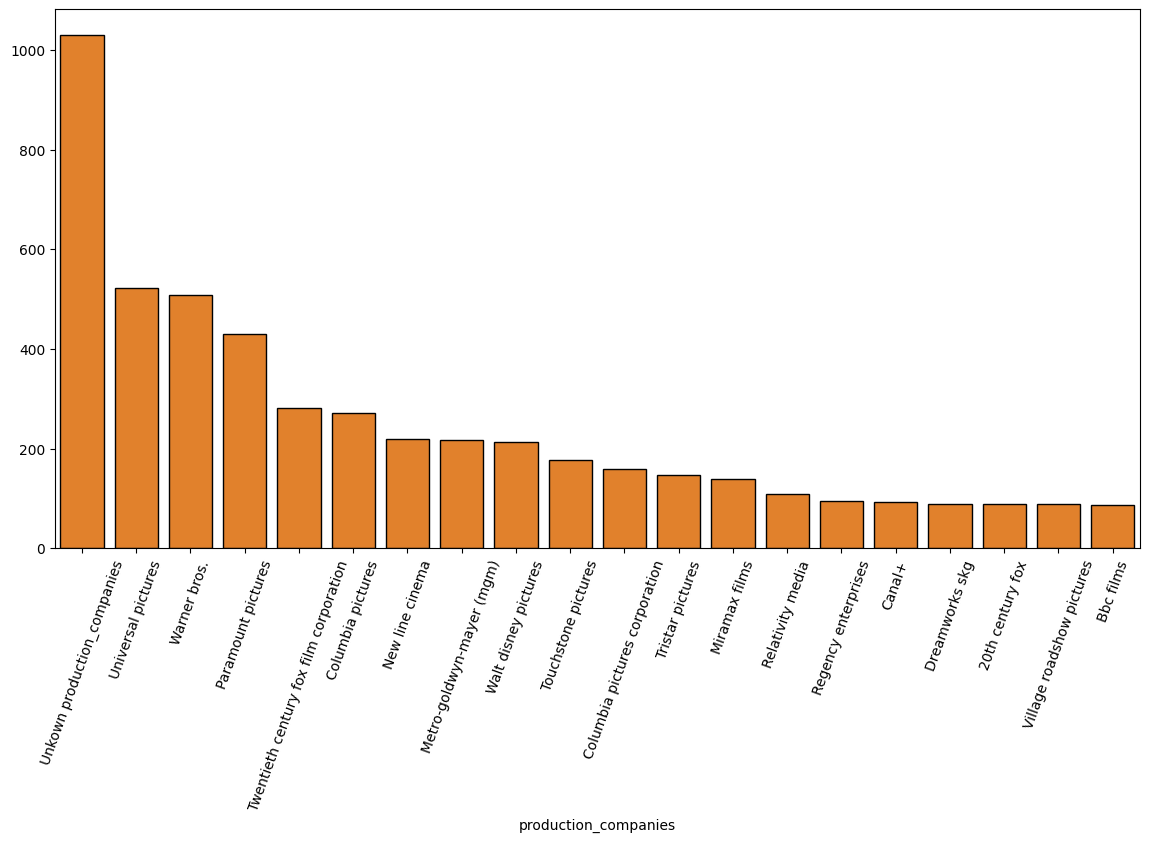

In [73]:
top_20_companies_releases = df['production_companies'].explode().value_counts()[:20]
plt.figure(figsize=(14,7))
plt.xticks(rotation=70)
sns.barplot(x=top_20_companies_releases.index, y=top_20_companies_releases.values,color = 'tab:orange', edgecolor='black')

### Research Question 7: How dose runetime and vote average correlate?

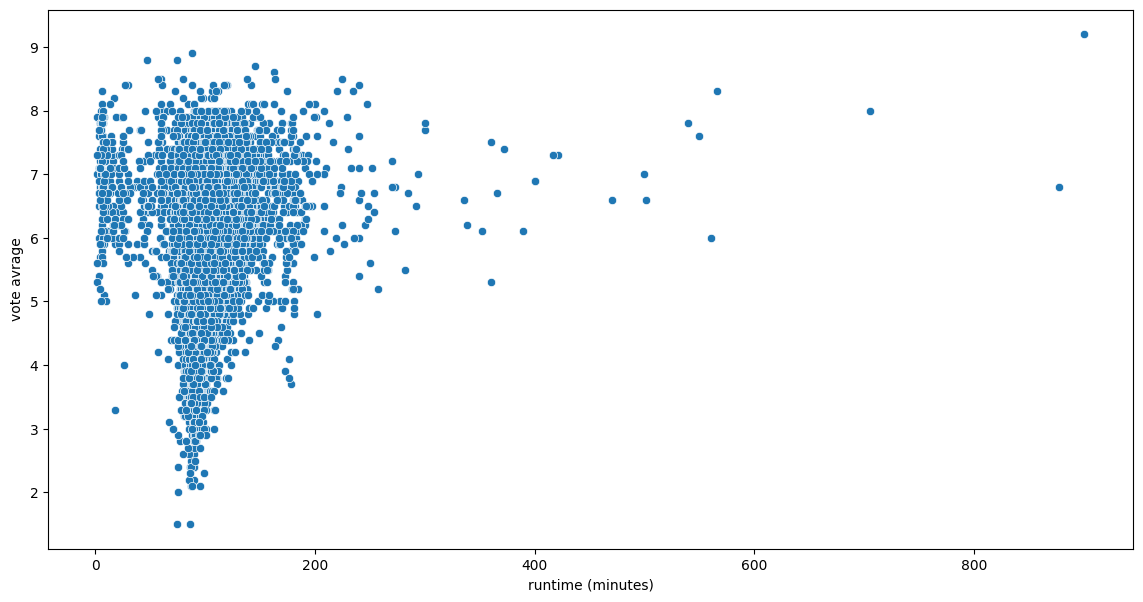

In [85]:
plt.figure(figsize=(14,7))
sns.scatterplot(data=df, x='runtime', y='vote_average');
plt.xlabel('runtime (minutes)')
plt.ylabel('vote avrage')
plt.show()

##### As we can observe, there is positive relationship between the vote_average and runtime attributes.

### Research Question 8: Which day of week does have the highest number of releases?

<Axes: xlabel='Day of week', ylabel='# of releases'>

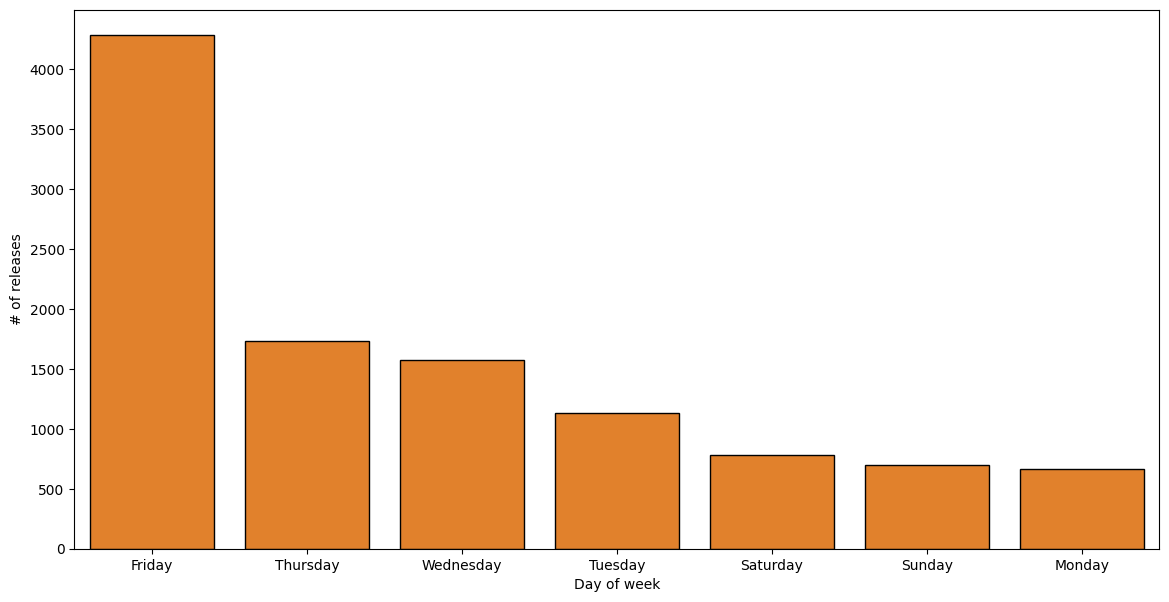

In [82]:
release_counts = df['release_date'].dt.day_name().value_counts()
plt.figure(figsize=(14,7))
plt.xlabel('Day of week')
plt.ylabel('# of releases')
sns.barplot(x=release_counts.index, y=release_counts.values, color = 'tab:orange', edgecolor='black')

### Research Question 9: How do budget and release yeare together affect revenue?

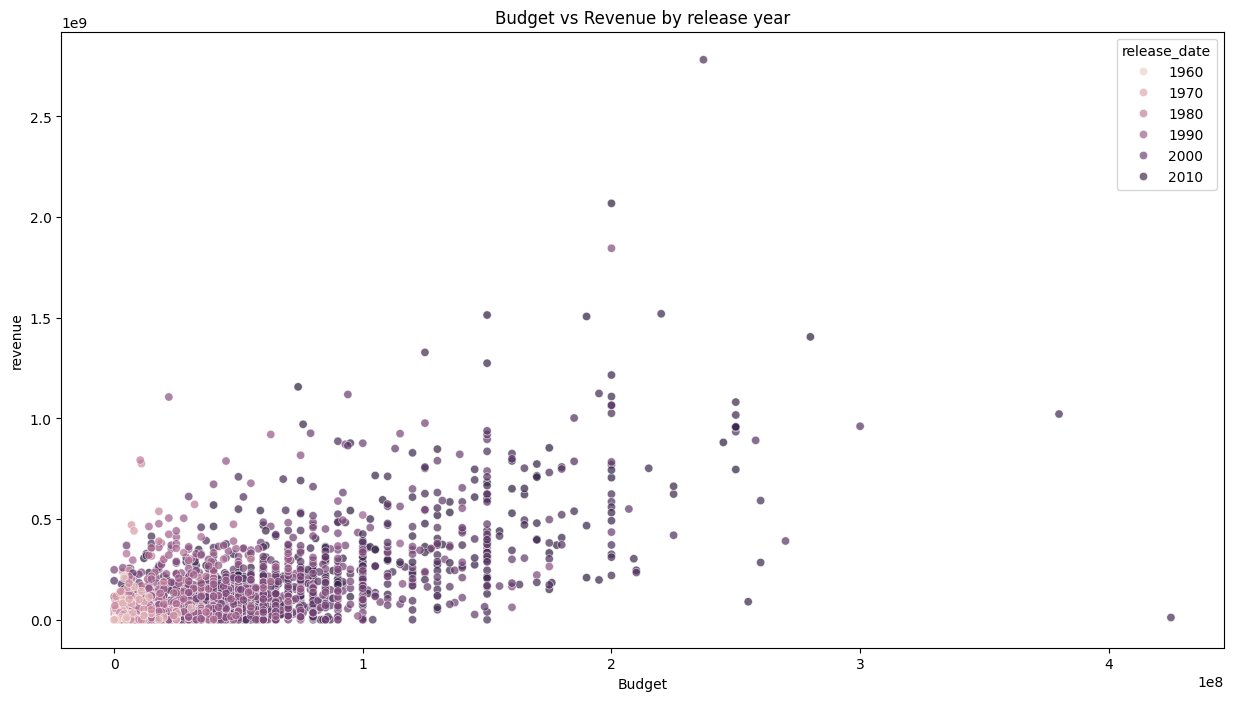

In [89]:
plt.figure(figsize=(15,8))
plt.title('Budget vs Revenue by release year')
plt.xlabel('Budget')
plt.ylabel('revenue')
sns.scatterplot(data=df, x='budget', y='revenue', hue=df['release_date'].dt.year, alpha=0.7);

##### The `revenue` and `budget` attribute are generally positive correlated, but, As we can observe from the scatter plot, as the time passes (release year increases), the `revenue` and `budget` increase as well.
##### We can say that (budget, release year) are positively correlated to revenue.

### Conclusions
##### The most preferred (popular) runntime lies between 150 and 200 minute.
##### A higher budget corresponds to a higher revenue.
##### 'Robert de niro' holds the record for the most frequent appearances in movies with a frequency of 75.
##### The movie with the highest profit is 'Avatar' with 2544505847 USD gain.
##### The movie with the lowest profit ids the 'Warriors way' with 413912431 USD Loss.
##### The most produced genre is 'Drama'.
##### The most popular genre in average is 'Adventure'.
##### For the limitation i faced, it is zero budget problem, which, i think, affect the answers of the question that involves budget.

In [90]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'Investigate_a_Dataset.ipynb' matched no files
